# PHYS 497 - Assignment 5

## Discrete Fourier Transform
____

#### Filobateer Ghaly - 10175960

In [1]:
import numpy as np
import math
import scipy
import matplotlib.pylab as plt

We can use either libraries or some functions to do the calculations for us. It is better to use functions in this case so that at least some of the work behind the calculations shows. Let us setup the problem by first introdcuing the forward Fourier Transform and the signal being analyzed.

The DFT is defined by:

$$  G_k = \sum_{m = 0}^{n -1} g_m \ e^{\Large \left(\frac{-2\pi m k j}{n} \right)}  $$

And the signal is given by: 

$$ x(t) = 3.0 \ \cos(2 \pi 2 t) + 1.0  \ \sin(2 \pi 4 t) $$ 

This means we have two signals, a **2 Hz cosine** wave and a **4 Hz sine** wave. This sets our expectations when performing our analysis.



___

### Q1: What is the period in seconds between each sample?

$$ T_s = \frac{1}{f_s} = \frac{1}{10} = 0.1 ~ s $$

___

### Q2: What are the specific frequencies represented in the set $G_k$ ?

$ G_k $ is a complex frequency series calculated based on the discretized frequency $ f_k $, where:

$$ f_k = k \frac{f_s}{n} $$

We can think of the DFT in terms of the discretized angular frequency $ \omega_k = 2 \pi f_k =  2 \pi \ k \  \Large\frac{f_s}{n} $. The normalized frequency can then be introduced: 

$$ \hat{\omega} = \frac{\omega}{ f_s}  = \frac{2 \pi  k   }{ n}  $$ 

The DFT can then be written as:

$$  G_k = \sum_{m = 0}^{n -1} g_m \ e^{\Large -m \hat{\omega}_k j } =  \sum_{m = 0}^{n -1} g_m \left[ \cos(m \hat{\omega}_k) - j \ \sin(m \hat{\omega}_k) \right] $$

We can see that by substituting the Euler's identity, any pure cosine signal will only have real parts, while a pure sine signal will only have imaginary parts. Our signal contains both, so we expect a complex series. 

---

At this sampling rate, we have two frequencies, the 2 Hz and the 4 Hz. The normalized frequencies can be written as:

- Cosine: $ \hat{\omega}_{cosine} = 2 \pi \cdot 2 /10 =  \frac{2 \pi}{5} = 0.4 \pi $ *(This would be the 2 Hz signal)*
- Sine: $ \hat{\omega}_{sine} = 2 \pi \cdot 4 /10 =  \frac{4 \pi}{5} = 0.8 \pi $ *(This would be the 4 Hz signal)*

___

### Q3: What is the Nyquist frequency? Is it sufficient to accurately capture this waveform in particular?

The Nyquist frequency:

$$f_N = f_s / 2 = 5 ~ Hz $$

According to Nyquist theorem, the sampling rate $ f_s $ must be at least twice the maximum frequency present in our signal, or:

$$  f_s \geq 2 \cdot f_{sine} = 2 \cdot 4 = 8 ~ Hz  $$

Another way of looking at it, the Nyquist frequency needs to be higher than the highest component frequency in our signal (the sine wave). This is true, and so we expect that this is sufficient. However, we explore this further in **Q6**.

___

### Q4: Write the discrete set of values $g_m$.

$g_m$ is simply the discretized form of the function $ x(t) $. We are taking 10 samples at a rate of 10 Hz, yielding a sampling period of $ T_s = 0.1 ~ s $. This means that every 0.1 of a second a sample is taken (10 samples per second). We can write the set of $g_m$ as follows:

$$ g_m = {g_0, \ g_1, \ ...  \ , \ g_{n-1}}   $$

Where, 

$$ g[m] = 3.0 \ \cos(0.4 \pi \ t_m) + 1.0 \sin(0.8 \pi \ t_m) $$

Here, $t_m = m \cdot T_s $. We can let the computer do the calculation for us:

In [2]:
def plot(x, y, xlabel, ylabel):
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y)
    plt.scatter(x, y, color = 'crimson', linewidths = 0.05, alpha = 0.5)
    plt.grid()

g[ 0 ]= 3.0
g[ 1 ]= 1.5148362354173157
g[ 2 ]= -3.3781074994199956
g[ 3 ]= -1.4759944668296887
g[ 4 ]= 0.3392657308323689
g[ 5 ]= 2.9999999999999996
g[ 6 ]= 1.5148362354173168
g[ 7 ]= -3.378107499419995
g[ 8 ]= -1.47599446682969
g[ 9 ]= 0.33926573083236855


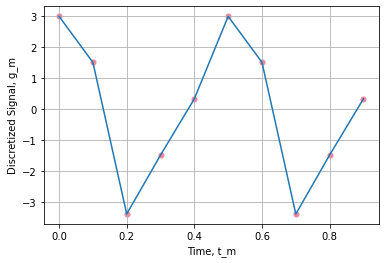

In [3]:
n = 10    # Number of samples
fs = 10   # Sampling rate
Ts = 1/fs # Sampling period

# Making an array of samples from 0 to 9 (total of 10)
# The spacing between each one is given by the sampling period
t_m = np.linspace(0, (n-1)*Ts, n) # Note, t(m) = m*Ts is this vector 

# This is our discretized function
# Both lines are identical
g_m = 3.0*np.cos(2*np.pi*2*t_m)+1.0*np.sin(2*np.pi*4*t_m); 
g_m = 3.0*np.cos(0.4*np.pi*t_m/Ts)+1.0*np.sin(0.8*np.pi*t_m/Ts); 

plot(t_m, g_m, 'Time, t_m', 'Discretized Signal, g_m') 

for i in range(0, len(g_m)):
    print("g[", i, ']=', g_m[i])

These are the values for $g_m$. This is defenitely not a good looking signal, but only because we are not taking many samples. The question is, is this sampling enough to represent our original frequencies? We answer this in **Q5** and **Q6**.

### Q5 & Q6: Calculate the coefficients $ G_k $ and discuss the results obtained to show that the result is consistent with the time series $ x(t) $.


We will use a DFT function at first. To check with a library, we use `scipy`'s FFT function. FFT stands for **Fast Fourier Transform** and is only a more efficient algorithm that is otherwise identical to the DFT. We will run this algorithm on the original signal first to see what we would expect to get.

A few things to note:
- Above the Nyquist frequency we don't gain any information. We expect to see a mirror image across the Nyquist.
- We know the sine would be a *'negative' frequency*, so if we want the entire spectrum all at once we use the absolute value.

In [4]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    N = len(x) 
    n = np.arange(N) # Make an array for the running index
    k = n.reshape((N, 1)) # Flatten into 1D
    e = np.exp(-2j * np.pi * k * n / N) # Define the exponential term
    
    X = np.dot(e, x) # Dot g_m with the exponential term for each entry in the array
    
    return np.array(X, dtype ="complex_") # Return a complex array

# Apply the DFT to g_m
G_k = DFT(g_m)

# Check with a library
G_k_lib = scipy.fft.fft(g_m)

for i in range(0, len(G_k)):
    diff = G_k[i] - G_k_lib[i]
    if diff < 1e-11: diff = 0
    print("The difference between the two for","G[", i, ']=', diff)

The difference between the two for G[ 0 ]= 0
The difference between the two for G[ 1 ]= 0
The difference between the two for G[ 2 ]= 0
The difference between the two for G[ 3 ]= 0
The difference between the two for G[ 4 ]= 0
The difference between the two for G[ 5 ]= 0
The difference between the two for G[ 6 ]= 0
The difference between the two for G[ 7 ]= 0
The difference between the two for G[ 8 ]= 0
The difference between the two for G[ 9 ]= 0


This means our results are consistent with a prebuilt library.

In [5]:
for i in range(0, len(G_k)):
    print("G[", i, ']=', G_k[i])

G[ 0 ]= 0j
G[ 1 ]= (-4.996003610813204e-16-4.996003610813204e-16j)
G[ 2 ]= (15-8.326672684688674e-16j)
G[ 3 ]= (2.4424906541753444e-15+5.051514762044462e-15j)
G[ 4 ]= (4.440892098500626e-16-5j)
G[ 5 ]= 6.581951968451215e-15j
G[ 6 ]= (7.66053886991358e-15+5.000000000000002j)
G[ 7 ]= (1.124100812432971e-15-4.218847493575595e-15j)
G[ 8 ]= (15+1.4765966227514582e-14j)
G[ 9 ]= (5.551115123125783e-15+2.8033131371785203e-15j)


This is the set of coefficients $ G_k$ that represent the magnitude of certain frequencies in our discretized signal. Notice that for the most part, these are all zeros. The computer usually has trouble showing zeros, we can add a line to show which entries are zero by assuming anything below $ 1 \times 10^{-11} $ as zero.

In [6]:
for i in range(0, len(G_k)):
    if abs(G_k[i]) < 1e-11: G_k[i] = 0
    print("G[", i, ']=', G_k[i])

G[ 0 ]= 0j
G[ 1 ]= 0j
G[ 2 ]= (15-8.326672684688674e-16j)
G[ 3 ]= 0j
G[ 4 ]= (4.440892098500626e-16-5j)
G[ 5 ]= 0j
G[ 6 ]= (7.66053886991358e-15+5.000000000000002j)
G[ 7 ]= 0j
G[ 8 ]= (15+1.4765966227514582e-14j)
G[ 9 ]= 0j


This makes it much clearer that we have only two frequencies in our signal (the sine and cosine waves). I say two because as discussed earlier, we would have a mirror image across the Nyquist. Also note, the sine wave component is purely imaginary while the cosine is purely real. This allows us to tell which is the sine from the cosine in our coefficients.

---

### Power Plot of Signal

Let us plot these results to get a better picture.

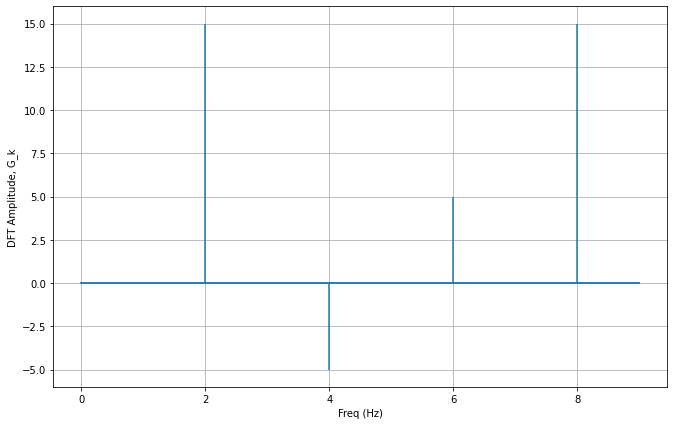

In [8]:
# Build the frequency space
N = len(g_m)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.figure(figsize = (11, 7))

plt.stem(freq, np.real(G_k), 'b', \
         markerfmt=" ", basefmt="C0", linefmt = 'C0');

plt.stem(freq, np.imag(G_k), 'b', \
         markerfmt=" ", basefmt="C0", linefmt = 'C0');

plt.xlabel('Freq (Hz)');
plt.ylabel('DFT Amplitude, G_k');
plt.grid()

This matches well with our expectations. There are a few things to note:

- The imaginary component is given by the negative frequency that is mirrored with a negative sign across the Nyquist *(because it is conjugated)* like we expect. It is also at 4 Hz representing the sine wave. 
- The real component represents the cosine wave and is indeed at 2 Hz like we expect. 
- Both components are not normalized, meaning the magnitude of the coefficients is not representative of the wave. 

Let us normalize the DFT and plot again, this time ignoring anything above the Nyquist. Let us also take the absolute value so that we are able to see the entire spectrum in one figure. To normalize, we note that across the folding frequency **(The Nyquist)** no new information is gained, so we have to normalize by dividing the magnitude of the transform by **N/2** instead of the entire set of size **N**. 

*We would have to worry with this normalizing if we had a DC term, but we don't so it's all g.*

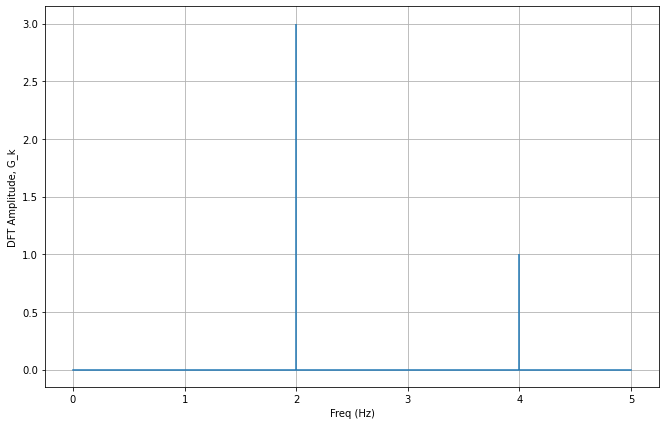

In [11]:
# We know the sine would be a 'negative' frequency, 
# so if we want the entire spectrum all at once we use the absolute value
G_k_norm = np.abs(G_k)/(N/2)

plt.figure(figsize = (11, 7))

# We also plot only halfway, till the Nyquist
plt.stem(freq[0:N//2 +1], G_k_norm[0:N//2 +1], 'b', \
         markerfmt=" ", basefmt="C0", linefmt = 'C0')

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude, G_k')
plt.grid()
plt.show()

In this plot, it is much clearer now that the sampling was representative of the analog signal. We can see the **2 Hz cosine** wave having a amplitude of **3.0**, while the **4 Hz sine** wave having a amplitude of **1.0**. This is indeed what we expect and is consistent with the time series.
___